In [1]:
import nltk
import gensim
from gensim.models.doc2vec import Doc2Vec



docs=Doc2Vec.load("world_history_doc2vec.bin")
newdoc=[]
for doc in docs.docvecs:
   newdoc.append(doc) 

print(len(newdoc))

1373


In [2]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.manifold import TSNE

titles=list(docs.docvecs.doctags.keys())


print(titles)

['Saints in medicine during the great wars of the twentieth century [Santos y beatos de la medicina en las grandes guerras del siglo xx]', 'Development and validation of prediction algorithms for major depressive episode in the general population', 'Multi-Purpose Empire: Ottoman History in Republican Turkey', 'Determinants of infant formula use and relation with growth in the first 4 months', 'Depression, somatization, and posttraumatic stress disorder in children born of occupation after world war II in comparison with a general population', 'Swedenborg and the Plurality of Worlds: Astrotheology in the Eighteenth Century', "The identity, legal status and origin of the Roman army's medical staff in the imperial age.", 'Collages of Memory: Remembering the Second World War Differently as the Epistemology of Crafting Cultural Conflicts between Russia and Ukraine', 'Quinacrine sterilization (QS): Time for reconsideration', "Historicizing the state in development theory: Michael Mann's mode

In [5]:
a_titles=[]
a_doc=[]
i=0
for title in titles:
    if("russian" in title.lower() or "german" in title.lower()):
        a_doc.append(newdoc[i])
        a_titles.append(" ".join(title.split(" ")[:7]))
        i=i+1
print(a_titles)

['[Russian Red Cross Society and its role', 'War pedagogy in the German primary school', 'Russian historical science in the new paradigm', 'German nurses during the First World War', 'Dead dads: Memory narratives of war-related fatherlessness', '[Sanitary and epidemiological supply for the Russian', 'The psychology of being unaccounted for, based', 'Supplier networks in the German aircraft industry', 'The "Spanish flu" in the German army', '"Voices of the People": Linguistic Research among', 'Development of neurology in Germany after 1960', 'Use of chemical war gases at the', 'Intestinal parasites in first world war german', 'German perspectives on tourism geography', '[The activities of the Russian Society of', '[The experience in orginizing medical supply of', 'Dr. Haakon sæthre: A norwegian neuroscientist and', 'Dermatologic relationships between the United States and', 'Review of the 2nd Historical Ciphers Colloquium', 'The fate of polish psychiatry under german', '[Russian physici

In [4]:
first_elements=20
a_titles=a_titles[:first_elements]
a_doc=a_doc[:first_elements]

In [6]:

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(a_doc)

Y=Y*100

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


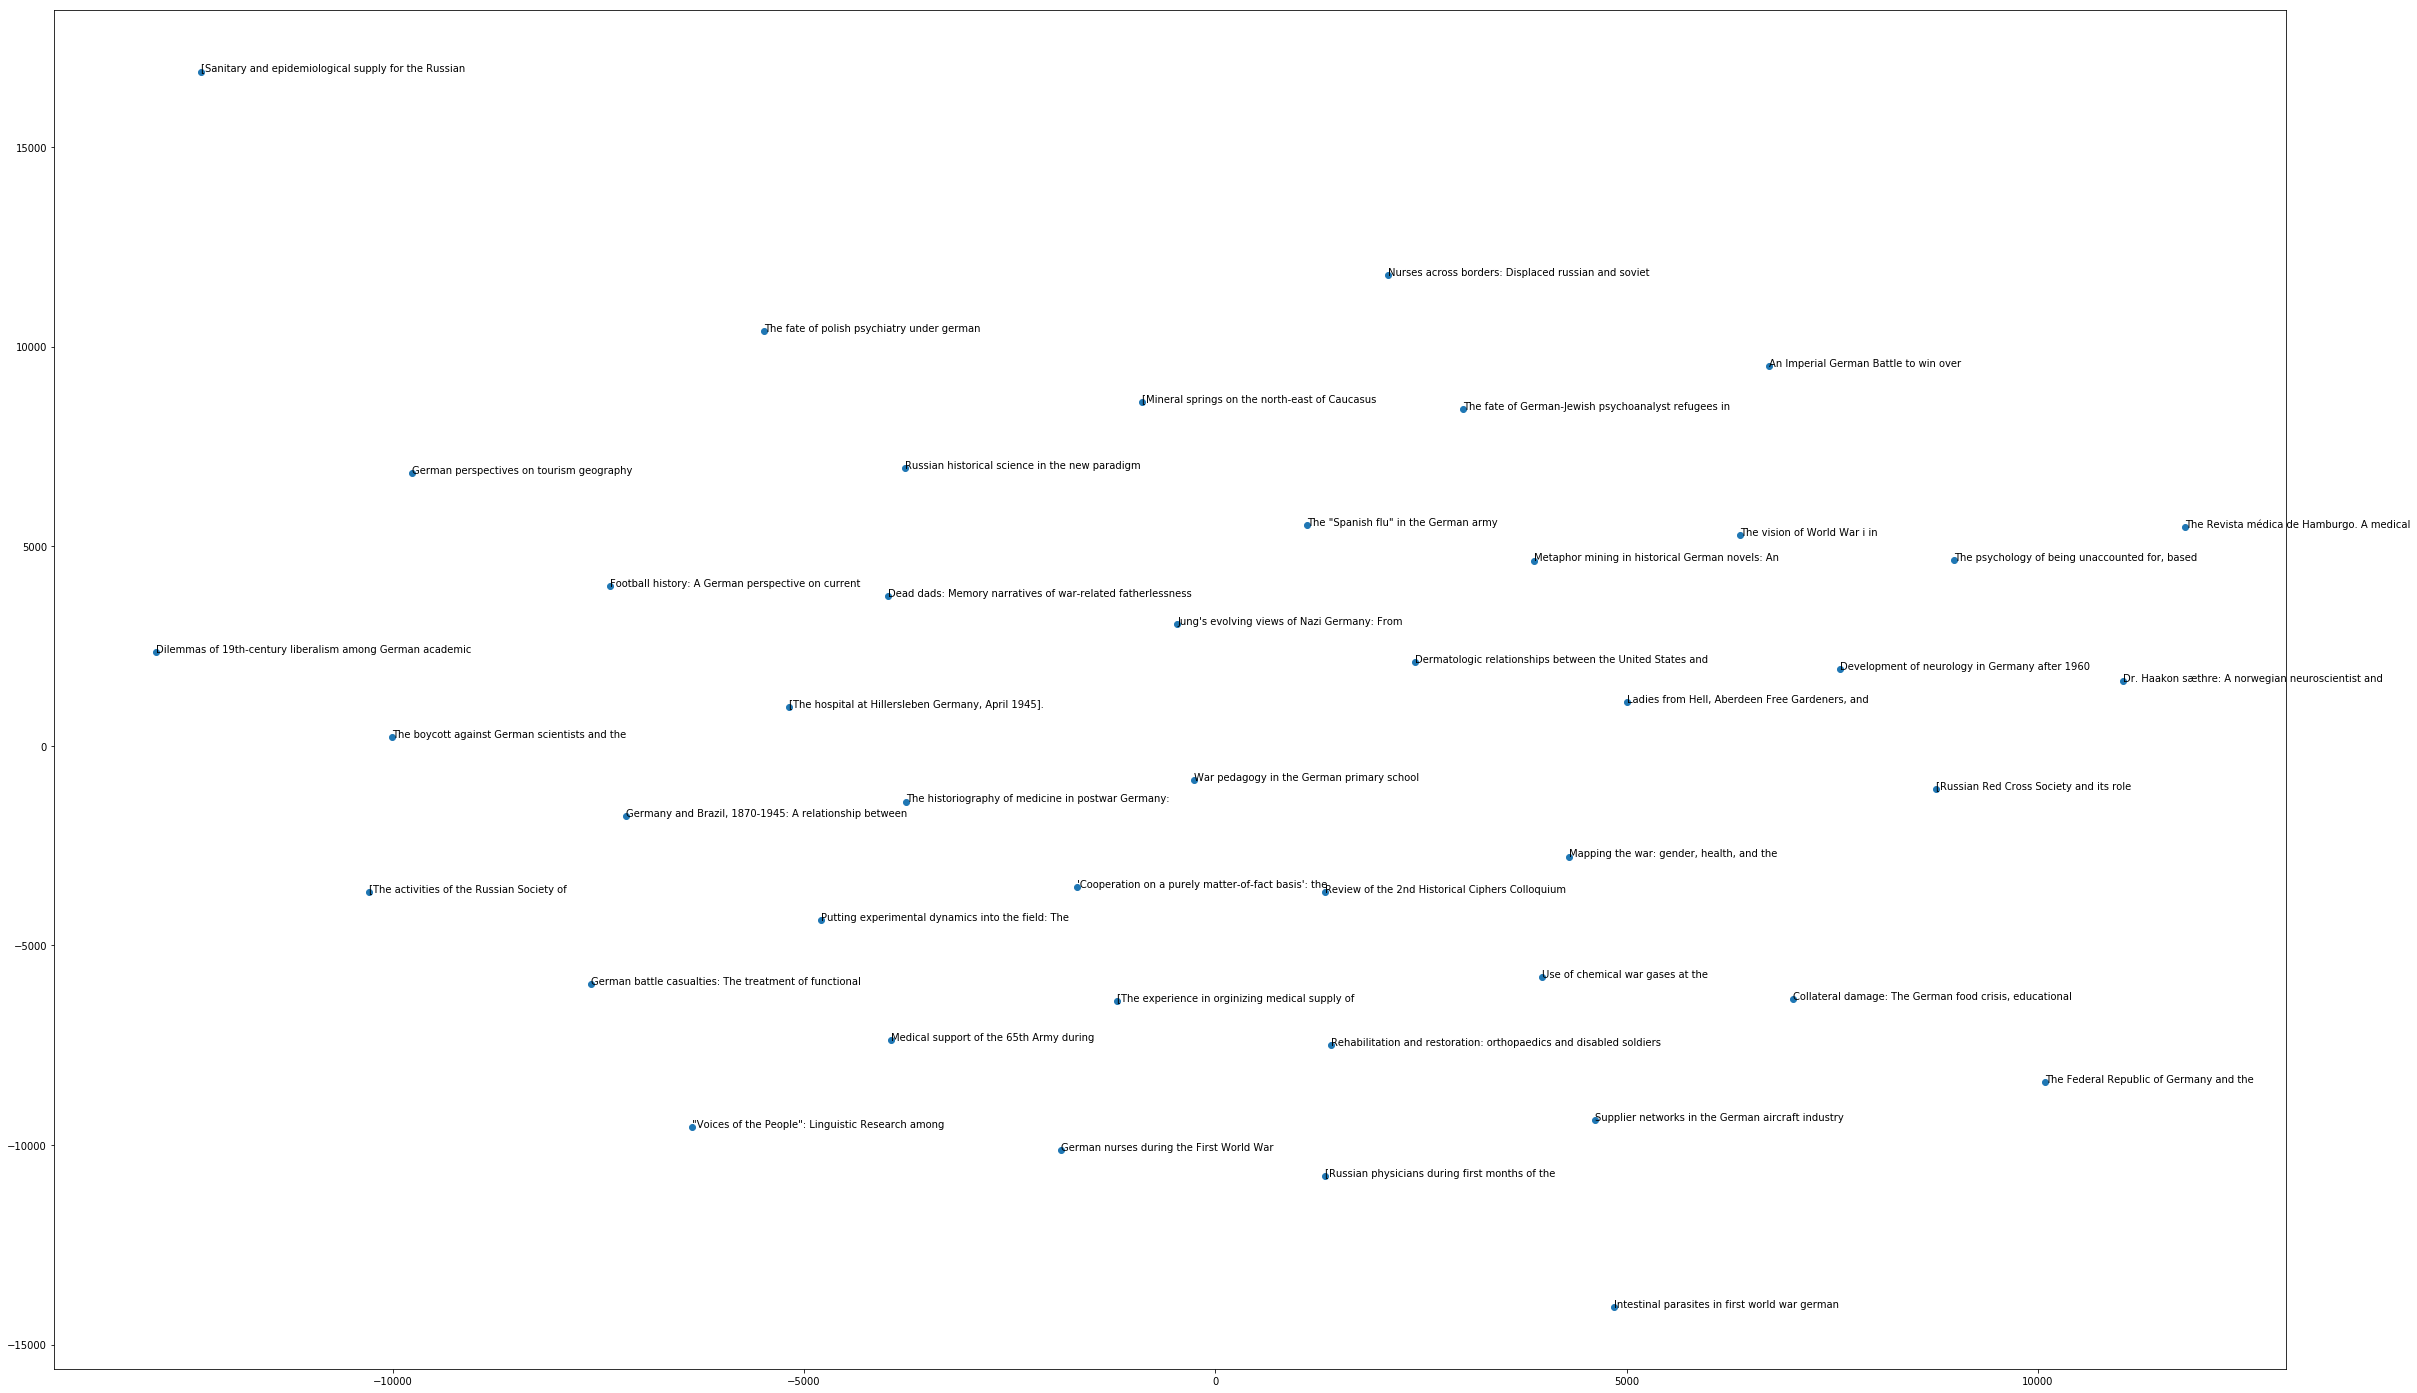

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (40,25)
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(a_titles, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()


In [31]:
docs.docvecs.most_similar(2)

[('Group signature based trace hiding in web query', 0.1838804930448532),
 ('Worn Grooves: Affective connectivity, mobility and recorded sound in the First World War',
  0.1824651062488556),
 ('Trade area analysis using User Generated Mobile Location Data',
  0.17707766592502594),
 ('The historical experience of therapeutic service in the Army and Navy during the Great Patriotic War',
  0.16694296896457672),
 ('A better Brazil [Um Brasil melhor]', 0.16091273725032806),
 ("'A matter of conscience': The moral authority of the world medical association and the readmission of the South Africans, 1976-1994",
  0.15812914073467255),
 ('Nursing typhus victims in the Second World War, 1942-1944: A discussion paper',
  0.1557072550058365),
 ('50 years of pediatric pulmonology: Progress and future',
  0.1555403172969818),
 ('Selectively personalizing query auto-completion', 0.15383493900299072),
 ('The (see text) in the Praecepta: The Medical Fee and its Impact on the Patient',
  0.1451365798711